### The formula for Partial Correlation is:



$$
r_{XY \cdot Z} = \frac{r_{XY} - r_{XZ} \cdot r_{YZ}}{\sqrt{(1 - r_{XZ}^2)(1 - r_{YZ}^2)}}
$$



In [ ]:
!pip install pingouin

Partial Correlation Result:
           n         r         CI95%         p-val
pearson  100  0.505589  [0.34, 0.64]  9.412396e-08


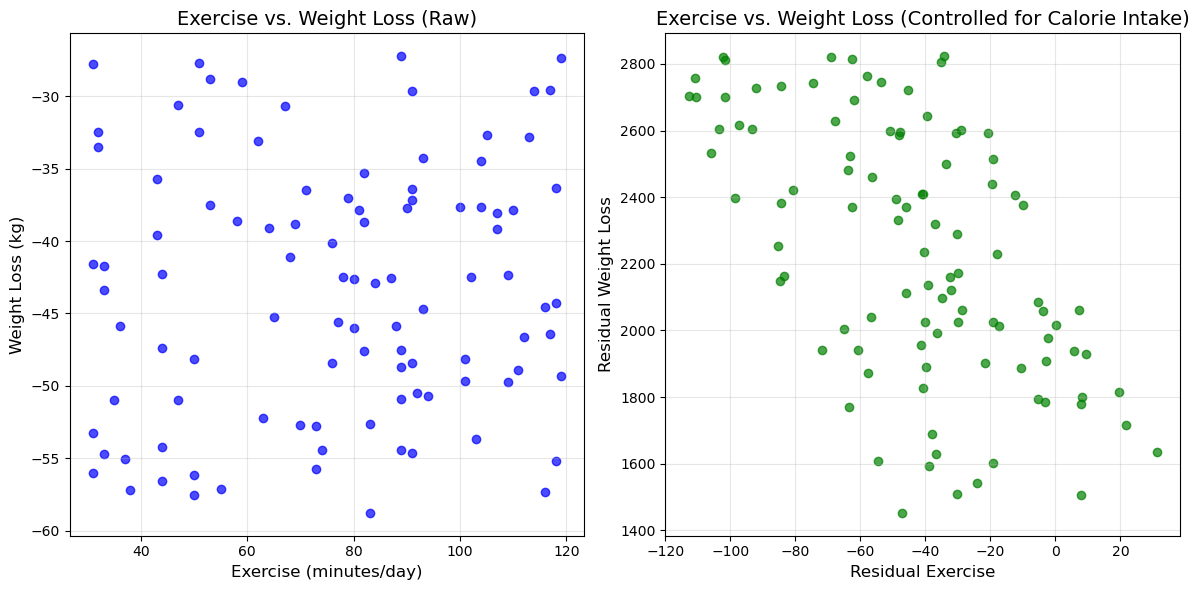

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pingouin import partial_corr

# Step 1: Simulate data for exercise, weight loss, and calorie intake
np.random.seed(42)
n = 100
exercise = np.random.randint(30, 120, size=n)  # Minutes of exercise per day
calorie_intake = np.random.randint(1500, 3000, size=n)  # Calories consumed per day
weight_loss = 0.05 * exercise - 0.02 * calorie_intake + np.random.randn(n) * 2  # Simulated weight loss (in kg)

# Step 2: Create a DataFrame
data = pd.DataFrame({
    'Exercise': exercise,
    'Weight_Loss': weight_loss,
    'Calorie_Intake': calorie_intake
})

# Step 3: Compute partial correlation
partial_corr_result = partial_corr(data=data, x='Exercise', y='Weight_Loss', covar='Calorie_Intake')

print("Partial Correlation Result:")
print(partial_corr_result)

# Step 4: Visualize the relationships
plt.figure(figsize=(12, 6))

# Scatter plot: Exercise vs. Weight Loss
plt.subplot(1, 2, 1)
plt.scatter(data['Exercise'], data['Weight_Loss'], alpha=0.7, color='blue')
plt.title("Exercise vs. Weight Loss (Raw)", fontsize=14)
plt.xlabel("Exercise (minutes/day)", fontsize=12)
plt.ylabel("Weight Loss (kg)", fontsize=12)
plt.grid(alpha=0.3)

# Scatter plot: Adjusted relationship using calorie intake
plt.subplot(1, 2, 2)
residual_weight_loss = data['Weight_Loss'] - partial_corr(data=data, x='Calorie_Intake', y='Weight_Loss')['r'].iloc[0] * data['Calorie_Intake']
residual_exercise = data['Exercise'] - partial_corr(data=data, x='Calorie_Intake', y='Exercise')['r'].iloc[0] * data['Calorie_Intake']

plt.scatter(residual_exercise, residual_weight_loss, alpha=0.7, color='green')
plt.title("Exercise vs. Weight Loss (Controlled for Calorie Intake)", fontsize=14)
plt.xlabel("Residual Exercise", fontsize=12)
plt.ylabel("Residual Weight Loss", fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
